## Homework 2

### Подготовка

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

In [71]:
def calc_std_feat(x):
    new_x = []
    for feature in x:
        new_x.append((feature - feature.mean()) / feature.std())
    new_x = np.array(new_x)
    return new_x

In [18]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [73]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [74]:
X_st = X.copy().astype(np.float64)

In [75]:
X_st[1:] = calc_std_feat(X[1:])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [110]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
    return W, calc_mse(y, y_pred)

### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).  

In [106]:
# lambda от 1е-8 до 1
lambda_list = np.geomspace(1e-8, 1, 20)
lambda_list

array([1.00000000e-08, 2.63665090e-08, 6.95192796e-08, 1.83298071e-07,
       4.83293024e-07, 1.27427499e-06, 3.35981829e-06, 8.85866790e-06,
       2.33572147e-05, 6.15848211e-05, 1.62377674e-04, 4.28133240e-04,
       1.12883789e-03, 2.97635144e-03, 7.84759970e-03, 2.06913808e-02,
       5.45559478e-02, 1.43844989e-01, 3.79269019e-01, 1.00000000e+00])

In [107]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [111]:
w_list = []
mse_list = []
for lambda_ in lambda_list:
    w, mse = eval_model_reg2(X_st, y, iterations=2000, alpha=1e-2, lambda_=lambda_)
    w_list.append(w)
    mse_list.append(mse)
w_list, mse_list = np.array(w_list), np.array(mse_list)
w_list

array([[57.39999943,  6.07258412,  1.50040917,  4.0933159 ],
       [57.39999849,  6.07258377,  1.50040955,  4.0933158 ],
       [57.39999601,  6.07258285,  1.50041054,  4.09331553],
       [57.39998948,  6.07258043,  1.50041315,  4.09331483],
       [57.39997226,  6.07257404,  1.50042004,  4.09331298],
       [57.39992686,  6.0725572 ,  1.50043819,  4.0933081 ],
       [57.39980715,  6.0725128 ,  1.50048606,  4.09329522],
       [57.39949152,  6.07239574,  1.50061226,  4.09326129],
       [57.39865933,  6.07208715,  1.50094495,  4.09317182],
       [57.39646525,  6.07127382,  1.50182169,  4.09293604],
       [57.39068103,  6.06913167,  1.50413033,  4.09231515],
       [57.37543567,  6.06349957,  1.51019646,  4.09068343],
       [57.33527777,  6.04876004,  1.52604631,  4.08641811],
       [57.22966441,  6.01064876,  1.56685428,  4.07542254],
       [56.95305522,  5.91511727,  1.667994  ,  4.04806542],
       [56.23639141,  5.69329439,  1.89579477,  3.98558312],
       [54.43049287,  5.

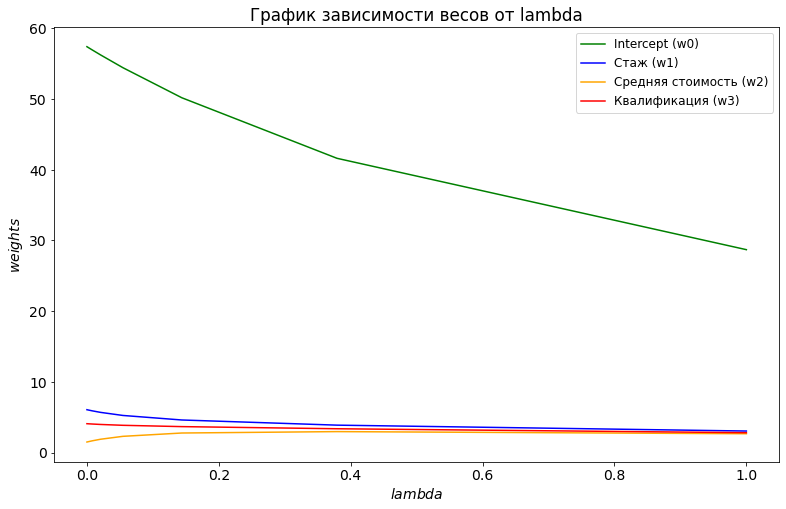

In [112]:
# Визуализируем
plt.figure(figsize=(13, 8))
plt.title('График зависимости весов от lambda')
plt.xlabel(r'$lambda$')
plt.ylabel(r'$weights$')

plt.plot(lambda_list, w_list[:, 0], color='green', label = 'Intercept (w0)')
plt.plot(lambda_list, w_list[:, 1], color='blue', label = 'Стаж (w1)')
plt.plot(lambda_list, w_list[:, 2], color='orange', label = 'Средняя стоимость (w2)')
plt.plot(lambda_list, w_list[:, 3], color='red', label = 'Квалификация (w3)')
plt.legend(fontsize=12)
plt.show()

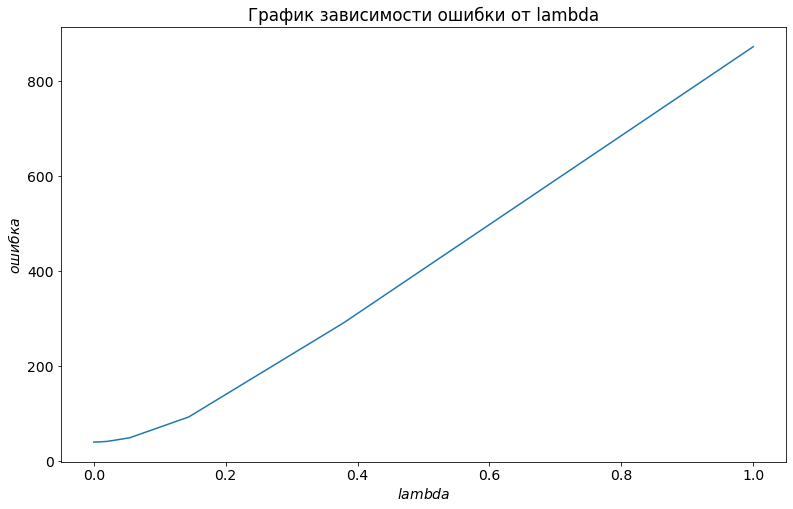

In [113]:
# Ошибка
plt.figure(figsize=(13, 8))
plt.title('График зависимости ошибки от lambda')
plt.xlabel(r'$lambda$')
plt.ylabel(r'$ошибка$')

plt.plot(lambda_list, mse_list)
plt.show()

### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Применить можно, но не имеет смысла, т.к. результатом будет то, что было применено последним. Изначально нормализованный признак станет стандартизированным и наоборот.

### 3. *Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [124]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W/np.absolute(W)) 
    return W, calc_mse(y, y_pred)

In [125]:
# сравним
eval_model_reg1(X_st, y, iterations=2000, alpha=1e-2, lambda_=1e-6)

(array([57.399999  ,  6.07258393,  1.50040868,  4.09331554]),
 39.77848906141956)

In [116]:
eval_model_reg2(X_st, y, iterations=2000, alpha=1e-2, lambda_=1e-6)

(array([57.3999426 ,  6.07256304,  1.5004319 ,  4.09330979]),
 39.77848958313503)

### 4. *Сравните на графиках изменение весов признаков от lambda в L1-регуляризации и L2-регуляризации (на данных из урока).

In [117]:
w_list_reg1 = []
w_list_reg2 = []
mse_list_reg1 = []
mse_list_reg2 = []
for lambda_ in lambda_list:
    w_reg1, mse_reg1 = eval_model_reg1(X_st, y, iterations=2000, alpha=1e-2, lambda_=lambda_)
    w_reg2, mse_reg2 = eval_model_reg2(X_st, y, iterations=2000, alpha=1e-2, lambda_=lambda_)
    w_list_reg1.append(w_reg1)
    w_list_reg2.append(w_reg2)
    mse_list_reg1.append(mse_reg1)
    mse_list_reg2.append(mse_reg2)
w_list_reg1, w_list_reg2 = np.array(w_list_reg1), np.array(w_list_reg2)
mse_list_reg1, mse_list_reg2 = np.array(mse_list_reg1), np.array(mse_list_reg2)

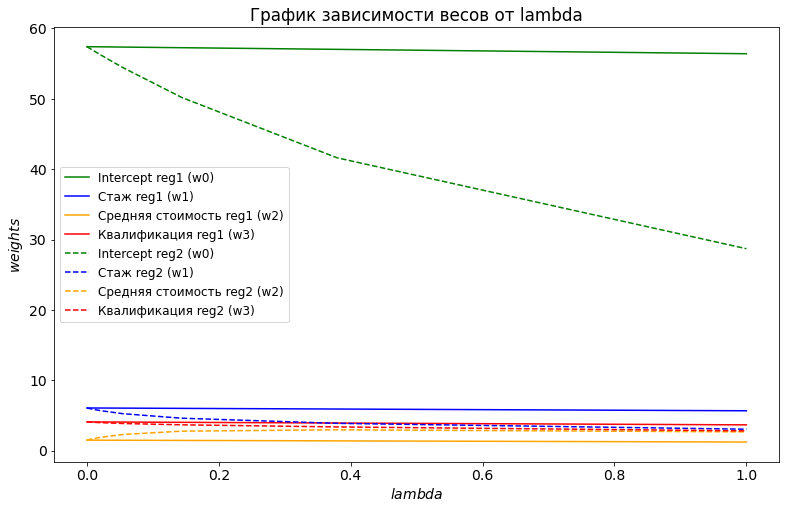

In [118]:
# Визуализируем
plt.figure(figsize=(13, 8))
plt.title('График зависимости весов от lambda')
plt.xlabel(r'$lambda$')
plt.ylabel(r'$weights$')

plt.plot(lambda_list, w_list_reg1[:, 0], color='green', label = 'Intercept reg1 (w0)')
plt.plot(lambda_list, w_list_reg1[:, 1], color='blue', label = 'Стаж reg1 (w1)')
plt.plot(lambda_list, w_list_reg1[:, 2], color='orange', label = 'Средняя стоимость reg1 (w2)')
plt.plot(lambda_list, w_list_reg1[:, 3], color='red', label = 'Квалификация reg1 (w3)')
plt.plot(lambda_list, w_list_reg2[:, 0], color='green', linestyle='dashed', label = 'Intercept reg2 (w0)')
plt.plot(lambda_list, w_list_reg2[:, 1], color='blue', linestyle='dashed', label = 'Стаж reg2 (w1)')
plt.plot(lambda_list, w_list_reg2[:, 2], color='orange', linestyle='dashed', label = 'Средняя стоимость reg2 (w2)')
plt.plot(lambda_list, w_list_reg2[:, 3], color='red', linestyle='dashed', label = 'Квалификация reg2 (w3)')
plt.legend(fontsize=12)
plt.show()

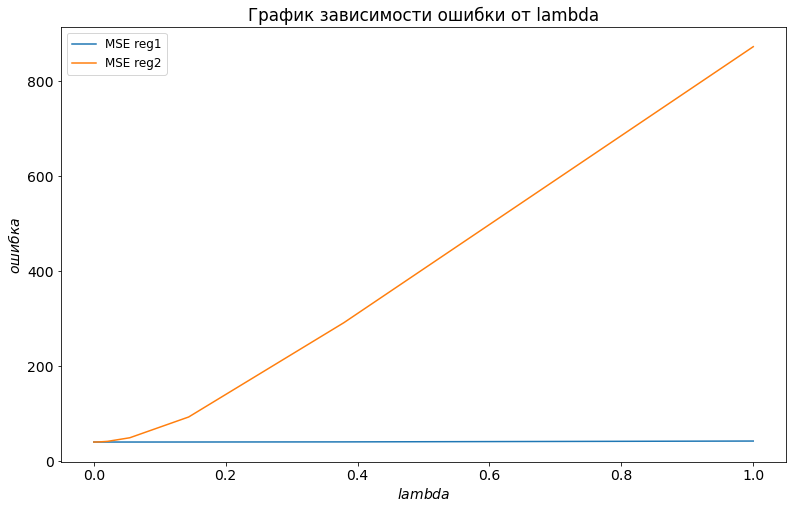

In [119]:
# Ошибка
plt.figure(figsize=(13, 8))
plt.title('График зависимости ошибки от lambda')
plt.xlabel(r'$lambda$')
plt.ylabel(r'$ошибка$')

plt.plot(lambda_list, mse_list_reg1, label = 'MSE reg1')
plt.plot(lambda_list, mse_list_reg2, label = 'MSE reg2')
plt.legend(fontsize=12)
plt.show()

In [131]:
X[:]

array([[   1,    1,    1,    1,    1,    1,    1,    1,    1,    1],
       [   1,    1,    2,    1,    3,    0,    5,   10,    1,    2],
       [ 500,  700,  750,  600, 1450,  800, 1500, 2000,  450, 1000],
       [   1,    1,    2,    1,    2,    1,    3,    3,    1,    2]])

### 5. *Постройте графики зависимости весов двух признаков (стаж и стоимость занятия) от количества итераций для градиентного спуска и для стохастического градиентного спуска (на данных из урока).

In [273]:
# Метод градиентного спуска
def eval_GD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    iter_list = []
    w_list = []
    mse_list = []
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T))
        if i % (iterations / 100) == 0:
            iter_list.append(i)
            w_list.append(W.copy())
            mse_list.append(err)
    return W, mse_list, iter_list, w_list

In [274]:
# Метод стохастического градиентного спуска
def eval_SGD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    iter_list = []
    w_list = []
    mse_list = []
    for i in range(1, iterations + 1):
        # случайный объект из выборки
        train_ind = np.random.randint(X.shape[1])
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred[train_ind] - y[train_ind]), X[:, train_ind].T))
        if i % (iterations / 100) == 0:
            iter_list.append(i)
            w_list.append(W.copy())
            mse_list.append(err)
    return W, mse_list, iter_list, w_list

In [279]:
W_GD, mse_list_GD, iter_list_GD, w_list_GD  = eval_GD(X_st, y, iterations=100000, alpha=1e-3)
W_SGD, mse_list_SGD, iter_list_SGD, w_list_SGD = eval_SGD(X_st, y, iterations=100000, alpha=1e-3)

w_list_GD, w_list_SGD = np.array(w_list_GD), np.array(w_list_SGD)
iter_list_GD, iter_list_SGD = np.array(iter_list_GD), np.array(iter_list_SGD)

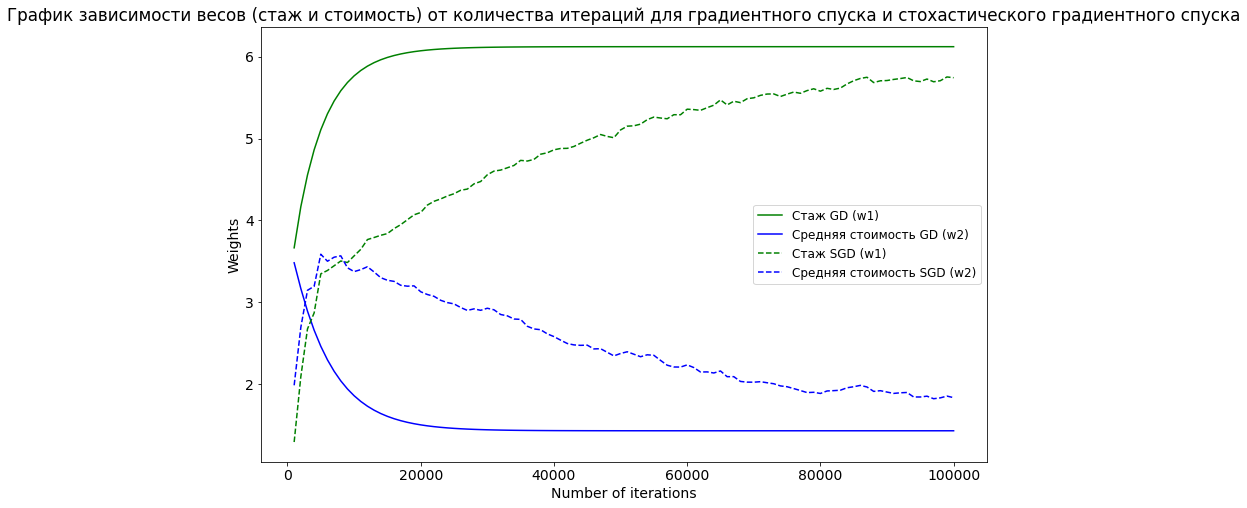

In [280]:
# Визуализируем
plt.figure(figsize=(13, 8))
plt.title('График зависимости весов (стаж и стоимость) от количества итераций для градиентного спуска и стохастического градиентного спуска')
plt.xlabel(r'Number of iterations')
plt.ylabel(r'Weights')

plt.plot(iter_list_GD, w_list_GD[:, 1], color='green', label = 'Стаж GD (w1)')
plt.plot(iter_list_GD, w_list_GD[:, 2], color='blue', label = 'Средняя стоимость GD (w2)')
plt.plot(iter_list_SGD, w_list_SGD[:, 1], color='green', linestyle='dashed', label = 'Стаж SGD (w1)')
plt.plot(iter_list_SGD, w_list_SGD[:, 2], color='blue', linestyle='dashed', label = 'Средняя стоимость SGD (w2)')
plt.legend(fontsize=12)
plt.show()

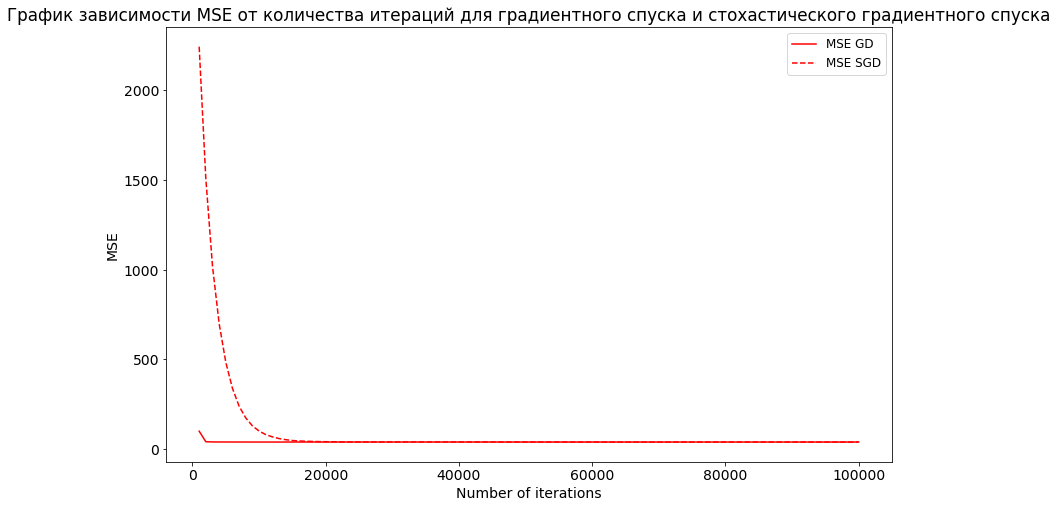

In [281]:
plt.figure(figsize=(13, 8))
plt.title('График зависимости MSE от количества итераций для градиентного спуска и стохастического градиентного спуска')
plt.xlabel(r'Number of iterations')
plt.ylabel(r'MSE')
plt.plot(iter_list_GD, mse_list_GD, color='red', label = 'MSE GD')
plt.plot(iter_list_SGD, mse_list_SGD, color='red', linestyle='dashed', label = 'MSE SGD')
plt.legend(fontsize=12)
plt.show()